In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
%matplotlib inline

In [ ]:
tf.__version__  # Tensorflow version.

'2.2.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Load the dataset of Nifty50

In [ ]:
df = pd.read_csv('/content/drive/My Drive/nifty_50/NIFTY50_all.csv')
print(df.shape)
df.head()

(223422, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
223417,2020-06-24,ZEEL,EQ,181.95,184.9,185.35,172.50,174.00,174.10,180.05,21628059,3.894106e+14,126608.0,3799934.0,0.1757
223418,2020-06-25,ZEEL,EQ,174.10,172.0,176.40,168.80,172.75,172.35,173.63,17818871,3.093893e+14,110808.0,3101417.0,0.1741
223419,2020-06-26,ZEEL,EQ,172.35,175.5,180.75,174.15,176.60,176.25,177.39,17933761,3.181294e+14,103078.0,2425494.0,0.1352
223420,2020-06-29,ZEEL,EQ,176.25,174.9,175.10,167.80,172.05,172.05,170.93,14624428,2.499745e+14,95422.0,2485891.0,0.1700
223421,2020-06-30,ZEEL,EQ,172.05,174.0,175.80,169.60,171.30,171.10,172.95,10280629,1.777998e+14,67886.0,1731100.0,0.1684


### The records of nifty50 from 2007 to 2020

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223422 entries, 0 to 223421
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                223422 non-null  object 
 1   Symbol              223422 non-null  object 
 2   Series              223422 non-null  object 
 3   Prev Close          223422 non-null  float64
 4   Open                223422 non-null  float64
 5   High                223422 non-null  float64
 6   Low                 223422 non-null  float64
 7   Last                223422 non-null  float64
 8   Close               223422 non-null  float64
 9   VWAP                223422 non-null  float64
 10  Volume              223422 non-null  int64  
 11  Turnover            223422 non-null  float64
 12  Trades              109918 non-null  float64
 13  Deliverable Volume  207432 non-null  float64
 14  %Deliverble         207432 non-null  float64
dtypes: float64(11), int64(1), object(3

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,223422.000000,223422.000000,223422.000000,223422.000000,223422.000000,223422.000000,223422.000000,2.234220e+05,2.234220e+05,1.099180e+05,2.074320e+05,207432.000000
mean,1218.317438,1219.773830,1238.053614,1200.114691,1218.478300,1218.636597,1219.185776,2.611478e+06,1.366138e+14,5.570936e+04,1.214080e+06,0.513534
std,2464.824656,2468.610922,2501.607192,2431.567691,2464.954843,2465.642550,2466.166537,5.867446e+06,2.604858e+14,5.933501e+04,2.609490e+06,0.188468
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,269.762500,270.000000,274.800000,265.050000,269.900000,269.800000,269.922500,1.998725e+05,1.456550e+13,2.035800e+04,1.169468e+05,0.379400
50%,554.150000,555.000000,564.800000,545.000000,554.500000,554.200000,554.680000,9.545740e+05,6.245021e+13,4.079800e+04,4.789200e+05,0.522800
75%,1221.050000,1221.775000,1241.800000,1201.000000,1221.000000,1221.137500,1221.687500,2.766916e+06,1.668324e+14,7.239300e+04,1.362355e+06,0.646800
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


## We will use columns (Open, High, Low, Last, Close, Volume) to build model.

In [ ]:
data = df[['Open', 'High', 'Low', 'Last', 'Close', 'Volume']]
data.index = df['Date'].values
print(data.shape)
data.head()

(223422, 6)


,Open,High,Low,Last,Close,Volume
2007-11-27,770.00,1050.00,770.0,959.0,962.90,27294366
2007-11-28,984.00,990.00,874.0,885.0,893.90,4581338
2007-11-29,909.00,914.75,841.0,887.0,884.20,5124121
2007-11-30,890.00,958.00,890.0,929.0,921.55,4609762
2007-12-03,939.75,995.00,922.0,980.0,969.30,2977470


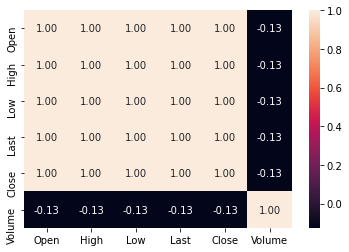

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

In [ ]:
data.describe()

,Open,High,Low,Last,Close,Volume
count,223422.000000,223422.000000,223422.000000,223422.000000,223422.000000,2.234220e+05
mean,1219.773830,1238.053614,1200.114691,1218.478300,1218.636597,2.611478e+06
std,2468.610922,2501.607192,2431.567691,2464.954843,2465.642550,5.867446e+06
min,8.500000,9.750000,8.500000,9.100000,9.150000,3.000000e+00
25%,270.000000,274.800000,265.050000,269.900000,269.800000,1.998725e+05
50%,555.000000,564.800000,545.000000,554.500000,554.200000,9.545740e+05
75%,1221.775000,1241.800000,1201.000000,1221.000000,1221.137500,2.766916e+06
max,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,4.810589e+08


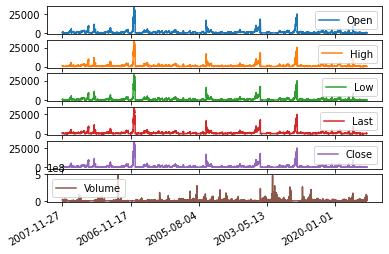

In [ ]:
# plot the distribution of each feature.
data.plot(subplots=True)
plt.show()

In [ ]:
# Standardize the data : Mean centring and Variance scaling.
Train_Size = int(data.shape[0]*0.8)
print('Train Size =',Train_Size)
data = data.values
mean_values = data[:Train_Size].mean(axis=0)
std_values = data[:Train_Size].std(axis=0)
print('Mean =',mean_values)
print('STD =',std_values)

data = (data - mean_values)/std_values

Train Size = 178737
Mean = [1.33381041e+03 1.35349217e+03 1.31268661e+03 1.33247388e+03
 1.33265177e+03 2.46374683e+06]
STD = [2.71460432e+03 2.75084101e+03 2.67393726e+03 2.71059268e+03
 2.71136302e+03 5.66408295e+06]


## Prepare the dataset for Time Series model.

In [ ]:
def prepare_data(dataset, target, start_index, end_index, history_size,
                      target_size):
  Data = []
  Labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i) 
    Data.append(dataset[indices])

    Labels.append(target[i:i+target_size]) 

  return np.array(Data), np.array(Labels)

In [ ]:
x_train, y_train = prepare_data(data, data[:, 4], 0, Train_Size, 15, 3)
x_test, y_test = prepare_data(data, data[:, 4], Train_Size, None, 15, 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178722, 15, 6)
(178722, 3)
(44667, 15, 6)
(44667, 3)


In [ ]:
#TF dataset
BATCH_SIZE = 256 # bacth size in batch-SGD/variants.
BUFFER_SIZE = 1000 # for shuffling the dataset.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_data = val_data.batch(BATCH_SIZE).repeat()

print(train_data)
print(val_data)

<RepeatDataset shapes: ((None, 15, 6), (None, 3)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 15, 6), (None, 3)), types: (tf.float64, tf.float64)>


## Model Architecture.

In [ ]:
STEPS_PER_EPOCH = 200
# Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(150, return_sequences=True, input_shape=x_train.shape[-2:]))
model.add(tf.keras.layers.LSTM(90, activation='elu'))
model.add(tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='elu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(3)) # for 3 outputs.

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 15, 150)           94200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 90)                86760     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                5824      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 99        
Total params: 188,963
Trainable params: 188,963
Non-trainable params: 0
________________________________________________

In [ ]:
# Callbacks.
earlystopper = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/NIFTY50_Models/nifty50_{epoch}_model')

In [ ]:
# Compile.
model.compile(optimizer='adam', loss='mse')

# Train.
model_history = model.fit(train_data, epochs=100,
                                            steps_per_epoch=STEPS_PER_EPOCH,
                                            validation_data=val_data,
                                            validation_steps=50,
                                            callbacks = [earlystopper, checkpointer])

Epoch 1/100
200/200 [==============================] - 39s 195ms/step - loss: 0.0123 - val_loss: 0.0033
Epoch 2/100
200/200 [==============================] - 38s 191ms/step - loss: 0.0886 - val_loss: 5.8142e-04
Epoch 3/100
200/200 [==============================] - 41s 204ms/step - loss: 0.0121 - val_loss: 0.0019
Epoch 4/100
200/200 [==============================] - 38s 189ms/step - loss: 0.0167 - val_loss: 6.3316e-04
Epoch 5/100
200/200 [==============================] - 37s 186ms/step - loss: 0.0379 - val_loss: 6.9948e-04
Epoch 6/100
200/200 [==============================] - 37s 183ms/step - loss: 0.0048 - val_loss: 5.2864e-04
Epoch 7/100
200/200 [==============================] - 38s 188ms/step - loss: 0.0173 - val_loss: 8.0314e-04
Epoch 8/100
200/200 [==============================] - 39s 193ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 9/100
200/200 [==============================] - 37s 185ms/step - loss: 0.0196 - val_loss: 3.3544e-04
Epoch 10/100
200/200 [==================

In [ ]:
# Plot train and validation loss over epochs.

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(loss)+1)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.grid()

  plt.show()

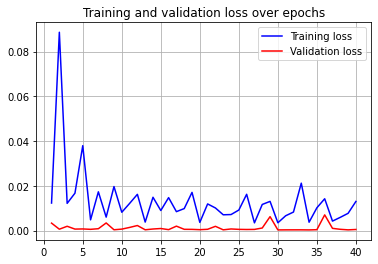

In [ ]:
plot_train_history(model_history, 'Training and validation loss over epochs')

In [ ]:
trained_model = tf.keras.models.load_model('/content/drive/My Drive/NIFTY50_Models/nifty50_30_model')

In [ ]:
score = trained_model.evaluate(train_data, steps=50)
print('Mean Square Error for Train Data =', np.round(score, 5))

50/50 [==============================] - 4s 74ms/step - loss: 6.9062e-04
Mean Square Error for Train Data = 0.00069


In [ ]:
m = tf.keras.metrics.RootMeanSquaredError()
_ = m.update_state(y_train, trained_model.predict(x_train))
m.result().numpy()

0.08969312

In [ ]:
score = trained_model.evaluate(val_data, steps=50)
print('Mean Square Error for Validation Data =', np.round(score, 5))

50/50 [==============================] - 3s 65ms/step - loss: 2.6563e-04
Mean Square Error for Validation Data = 0.00027


In [ ]:
_ = m.update_state(y_test, trained_model.predict(x_test))
m.result().numpy()

0.08113204

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  plt.grid()
  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out), np.array(true_future), 'go',
           label='True Closing Prices')
  if prediction.any():
    plt.plot(np.arange(num_out), np.array(prediction), 'ro',
             label='Predicted Closing Prices')
  plt.legend(loc='upper left')
  plt.show()

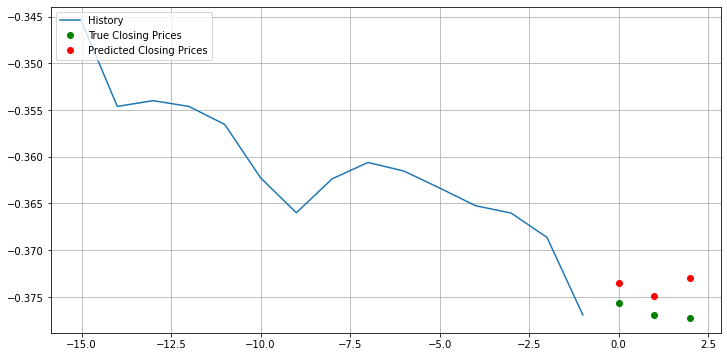

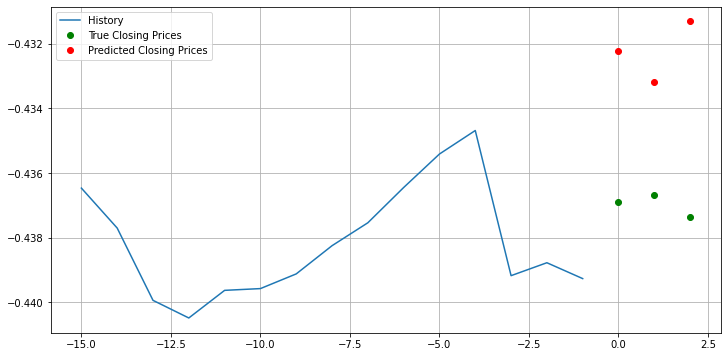

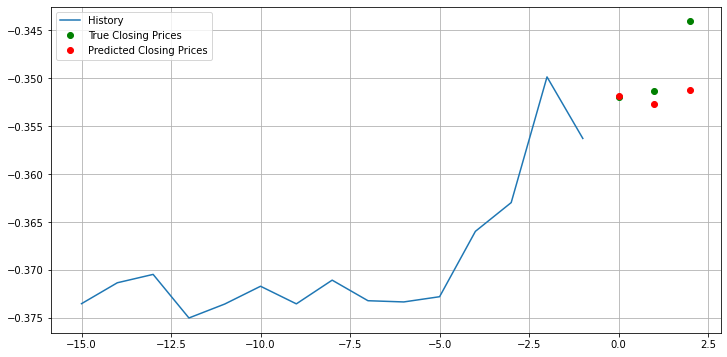

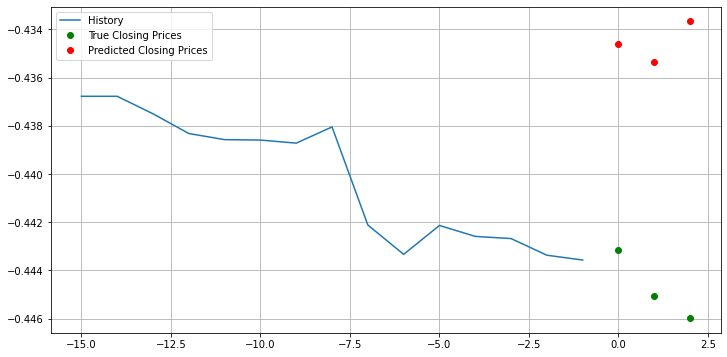

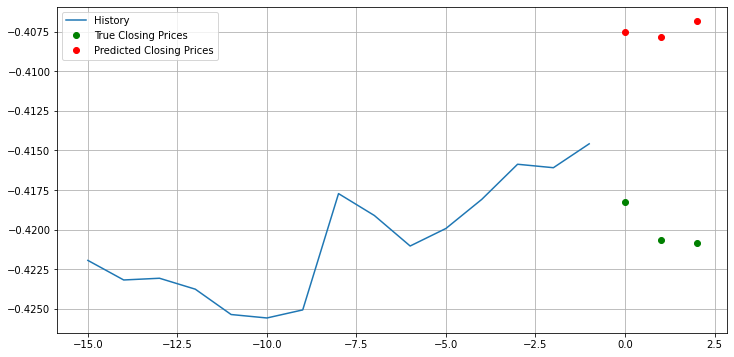

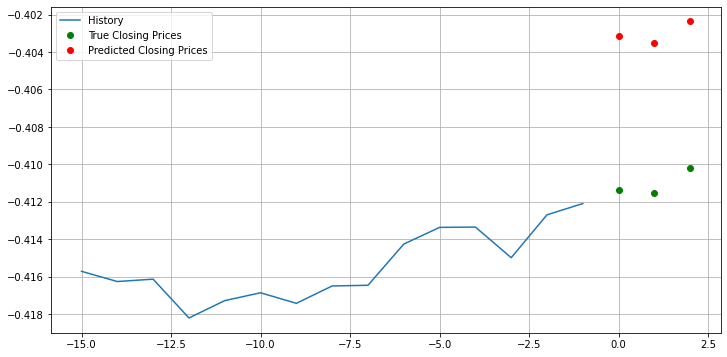

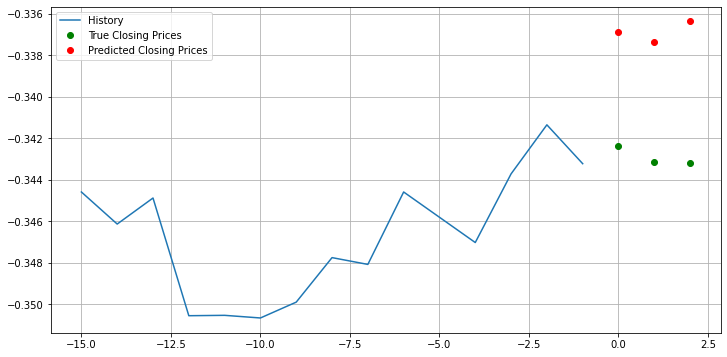

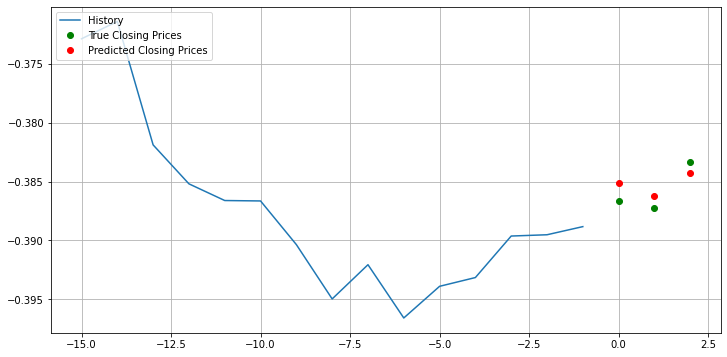

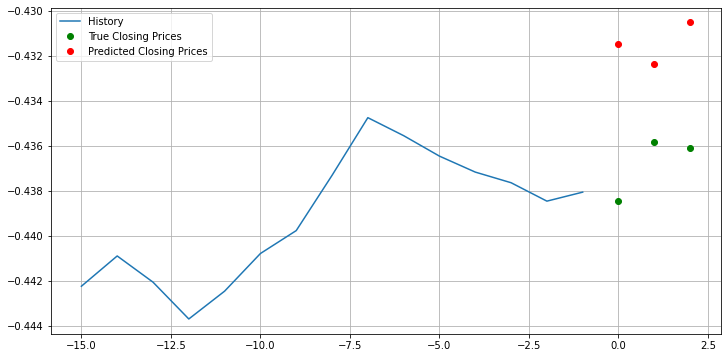

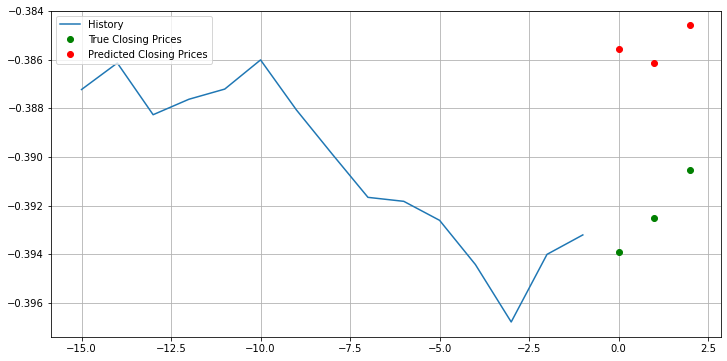

In [ ]:
# for any  10 random train points.
for x, y in train_data.take(10):
  pred = trained_model.predict(x)[0]
  multi_step_plot(x[0], y[0], pred)

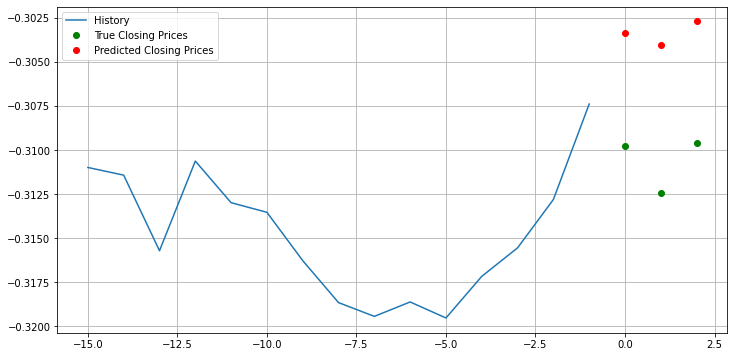

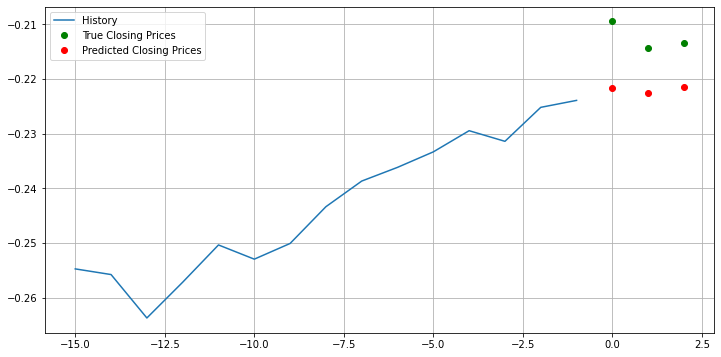

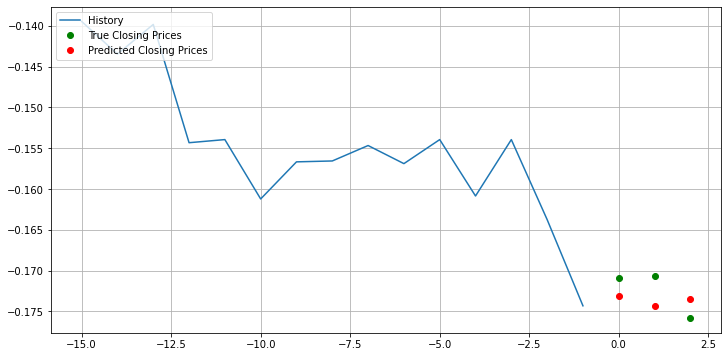

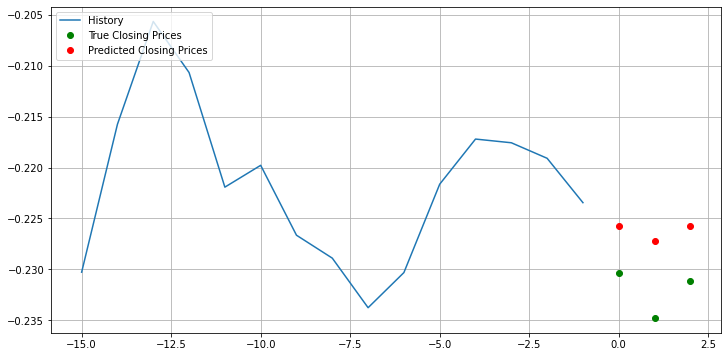

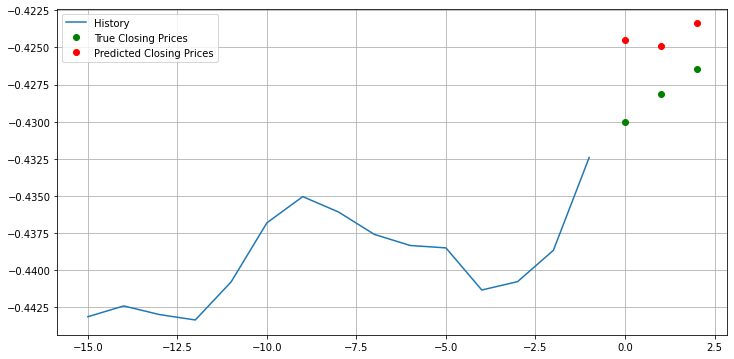

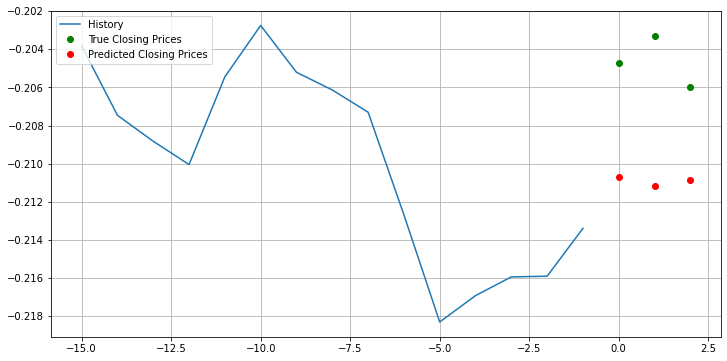

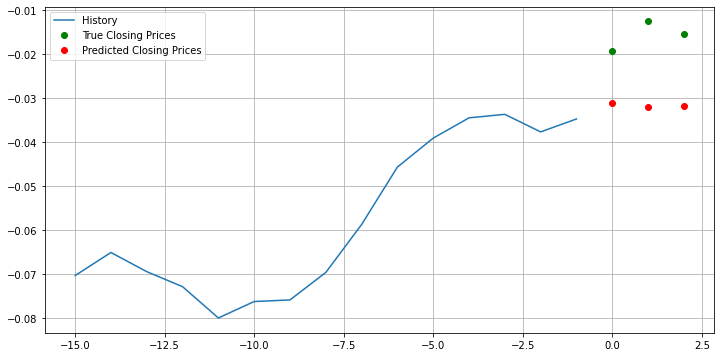

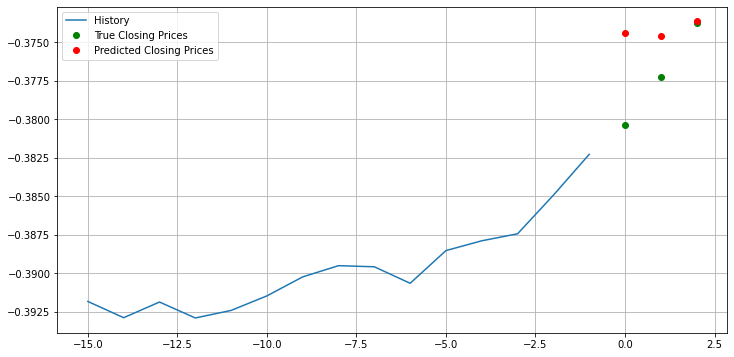

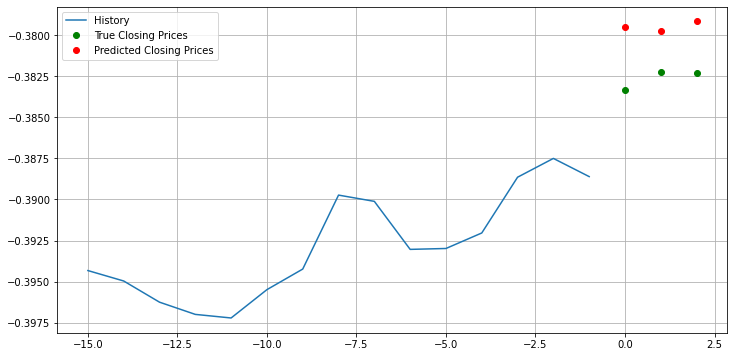

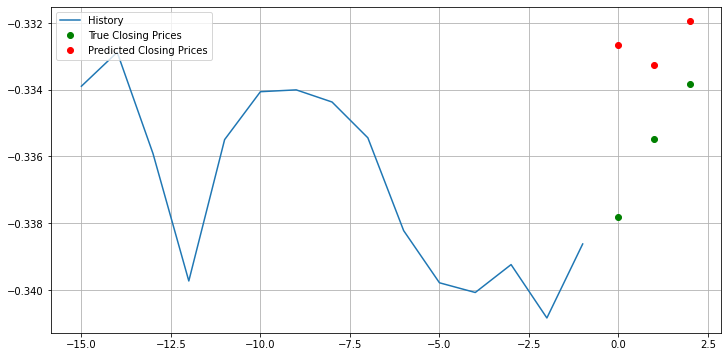

In [ ]:
# for any 5 random val points.
for x, y in val_data.take(10):
  multi_step_plot(x[0], y[0], trained_model.predict(x)[0])